# SPOTIFY DOWNLOAD RAW CODE

## First and foremost, run the below code to install every necessary libraries



In [7]:
! pip install requests
! pip install mutagen
! pip install ipywidgets
! pip install IPython

clear_output()

### Download Playlist/Album

Run the below code block.

It will display the block in which you can paste the URL to your album/playlist to.

The URL is not the link in the search bar, you acquire it from share feature from spotify.



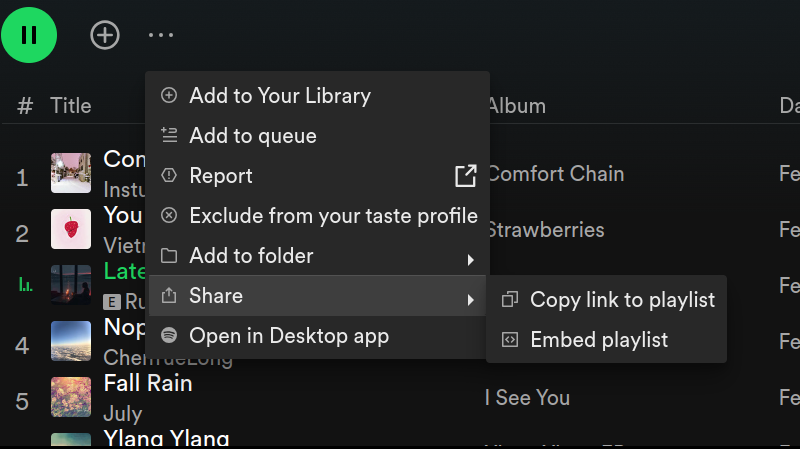


Then just paste the link into the block and press 'Submit Link'

In [13]:
import os
import string

import requests
import re
from mutagen.easyid3 import EasyID3
from mutagen.id3 import APIC, ID3
import ipywidgets as widgets



def returnSPOT_ID(link):
        # # The 'returnSPOT_ID' function from your scraper code

        # Define the regular expression pattern for the Spotify playlist URL
        pattern = r"https://open\.spotify\.com/playlist/([a-zA-Z0-9]+)\?si=.*"

        # Try to match the pattern in the input text
        match = re.match(pattern, link)

        if not match:
            return False
        return True


# variables
CWD = os.getcwd()
LOCATION = os.path.join(CWD,'MUSIC')
if os.path.isdir(LOCATION)==False:
    os.mkdir(LOCATION)

from IPython.display import display, HTML, Javascript, Audio

import IPython

# Custom CSS styles
custom_css = HTML("""
<style>
    .input-container {
        display: flex;
        flex-direction: row;
        align-items: center;
        margin-bottom: 10px;
    }
    .input-field {
        flex: 1;
        padding: 5px;
        font-size: 14px;
        border: 2px solid #007BFF;
        border-radius: 5px;
    }
    .submit-button {
        background-color: #007BFF;
        color: white;
        padding: 5px 10px;
        border: none;
        border-radius: 5px;
        cursor: pointer;
    }
    .submit-button:hover {
        background-color: #0056b3;
    }
</style>
""")

# Function to handle button click event
def handle_link_button_click(b):
    global SPOTIFY_PLAYLIST_LINK
    # Get the link from the input field
    if returnSPOT_ID(link_input.value) :
        SPOTIFY_PLAYLIST_LINK = link_input.value
         # Display the entered link as a clickable HTML link
        display(HTML(f"Playlist Link Entered : <a href='{SPOTIFY_PLAYLIST_LINK}' target='_blank'>{SPOTIFY_PLAYLIST_LINK}</a>"))

        # Store the entered link as a global variable
        IPython.get_ipython().run_line_magic('store', 'SPOTIFY_PLAYLIST_LINK')
    else:
        print('[*] Something Not Right about that link...  Try Again Please..')



# Create a text input widget for entering the link
link_input = widgets.Text(placeholder="Enter a link")

# Create a button widget
link_button = widgets.Button(description="Submit Link")

# Attach the button click event handler
link_button.on_click(handle_link_button_click)

print('[*] Please Enter Spotify Playlist Link :')
# Display the custom CSS styles, input field, and button
# display(custom_css)
display(widgets.VBox([link_input, link_button]))

[*] Please Enter Spotify Playlist Link :


[*] Something Not Right about that link...  Try Again Please..


Stored 'SPOTIFY_PLAYLIST_LINK' (str)


### Run the crawler

First the Scraper explore all the songs from your playlist, looking for them on Youtube, copying the first YTB link to YMate and finally downloading the MP3 to your PC.

In [14]:
class MusicScraper():

    def __init__(self):
        super(MusicScraper, self).__init__()
        self.counter = 0  # Initialize the counter to zero
        self.session = requests.Session()

    def get_ID(self, yt_id):
        # The 'get_ID' function from your scraper code
        LINK = f'https://api.spotifydown.com/getId/{yt_id}'
        headers = {
            'authority': 'api.spotifydown.com',
            'method': 'GET',
            'path': f'/getId/{id}',
            'origin': 'https://spotifydown.com',
            'referer': 'https://spotifydown.com/',
            'sec-ch-ua': '"Not_A Brand";v="99", "Google Chrome";v="109", "Chromium";v="109"',
            'sec-fetch-mode': 'cors',
            'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'
        }
        response = self.session.get(url=LINK, headers=headers)
        if response.status_code == 200:
            data = response.json()
            return data['id']
        return None

    def generate_Analyze_id(self, yt_id):
        # The 'generate_Analyze_id' function from your scraper code
        DL = 'https://corsproxy.io/?https://www.y2mate.com/mates/analyzeV2/ajax'
        data = {
            'k_query': f'https://www.youtube.com/watch?v={yt_id}',
            'k_page': 'home',
            'hl': 'en',
            'q_auto': 0,
        }
        headers = {
            'authority': 'corsproxy.io',
            'method': 'POST',
            'path': '/?https://www.y2mate.com/mates/analyzeV2/ajax',
            'origin': 'https://spotifydown.com',
            'referer': 'https://spotifydown.com/',
            'sec-ch-ua': '"Not_A Brand";v="99", "Google Chrome";v="109", "Chromium";v="109"',
            'sec-fetch-mode': 'cors',
            'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'
        }
        RES = self.session.post(url=DL, data=data, headers=headers)
        if RES.status_code == 200:
            return RES.json()
        return None

    def generate_Conversion_id(self, analyze_yt_id, analyze_id):
        # The 'generate_Conversion_id' function from your scraper code
        DL = 'https://corsproxy.io/?https://www.y2mate.com/mates/convertV2/index'
        data = {
            'vid'   : analyze_yt_id,
            'k'     : analyze_id,
        }
        headers = {
            'authority': 'corsproxy.io',
            'method': 'POST',
            'path': '/?https://www.y2mate.com/mates/analyzeV2/ajax',
            'origin': 'https://spotifydown.com',
            'referer': 'https://spotifydown.com/',
            'sec-ch-ua': '"Not_A Brand";v="99", "Google Chrome";v="109", "Chromium";v="109"',
            'sec-fetch-mode': 'cors',
            'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'
        }
        RES = self.session.post(url=DL, data=data, headers=headers)
        if RES.status_code == 200:
            return RES.json()
        return None

    def get_PlaylistMetadata(self, Playlist_ID):
        # The 'get_PlaylistMetadata' function from your scraper code
        URL = f'https://api.spotifydown.com/metadata/playlist/{Playlist_ID}'
        headers = {
            'authority': 'api.spotifydown.com',
            'method': 'GET',
            'path': f'/metadata/playlist/{Playlist_ID}',
            'scheme': 'https',
            'origin': 'https://spotifydown.com',
            'referer': 'https://spotifydown.com/',
            'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36',
        }
        meta_data = self.session.get(headers=headers, url=URL)
        if meta_data.status_code == 200:
            return meta_data.json()['title'] + ' - ' + meta_data.json()['artists']
        return None

    def errorcatch(self, SONG_ID):
        # The 'errorcatch' function from your scraper code
        print('[*] Trying to download...')
        headers = {
            'authority': 'api.spotifydown.com',
            'method': 'GET',
            'path': f'/download/{SONG_ID}',
            'scheme': 'https',
            'origin': 'https://spotifydown.com',
            'referer': 'https://spotifydown.com/',
            'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36',
        }
        x = self.session.get(headers=headers, url='https://api.spotifydown.com/download/' + SONG_ID)
        if x.status_code == 200:
            return x.json()['link']
        return None

    def V2catch(self, SONG_ID):
        ## Updated .. .19TH OCTOBER 2023
        # yt_id = self.get_ID(SONG_ID)

        # domain = ["co.wuk.sh", "cobalt2.snapredd.app"]
        # target_domain = domain[random.randint(0,len(domain) - 1)]
        headers = {
            "authority": "api.spotifydown.com",
            "method": "POST",
            "path": '/download/68GdZAAowWDac3SkdNWOwo',
            "scheme": "https",
            "Accept": "*/*",

            'Sec-Ch-Ua':'"Chromium";v="118", "Google Chrome";v="118", "Not=A?Brand";v="99"',
            "Dnt": '1',
            "Origin": "https://spotifydown.com",
            "Referer": "https://spotifydown.com/",
            "Sec-Ch-Ua-Mobile": "?0",
            "Sec-Fetch-Dest": "empty",
            "Sec-Fetch-Mode": "cors",
            "Sec-Fetch-Site": "cross-site",
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36'
        }

        ## Updated .. .29TH OCTOBER 2023
        x = self.session.get(url = f'https://api.spotifydown.com/download/{SONG_ID}', headers=headers)

        # if x.status_code == 200:

        #     # par = {
        #     #     'aFormat':'"mp3"',
        #     #     'dubLang':'false',
        #     #     'filenamePattern':'"classic"',
        #     #     'isAudioOnly':'true',
        #     #     'isNoTTWatermark':'true',
        #     #     'url':f'"https%3A%2F%2Fwww.youtube.com%2Fwatch%3Fv%3D{yt_id}"'
        #     # }

        #     file_status = self.session.post(url=f"https://{target_domain}/api/json", json=par, headers=headers)
        # print('[*] Data Gathered : ', str(x.content))
        if x.status_code == 200:

            try:
                return {
                    'link' : x.json()['link'],
                    'metadata' : None
                }
            except:
                return {
                    'link' : None,
                    'metadata' : None
                }

        return None


    def scrape_playlist(self, spotify_playlist_link, music_folder):
        ID = self.returnSPOT_ID(spotify_playlist_link)
        PlaylistName = self.get_PlaylistMetadata(ID)
        print('Playlist Name : ', PlaylistName)
        # Create Folder for Playlist
        if not os.path.exists(music_folder):
            os.makedirs(music_folder)
        try:
            FolderPath = ''.join(e for e in PlaylistName if e.isalnum() or e in [' ', '_'])
            playlist_folder_path = os.path.join(music_folder, FolderPath)
        except:
            playlist_folder_path = music_folder

        if not os.path.exists(playlist_folder_path):
            os.makedirs(playlist_folder_path)

        headers = {
            'authority': 'api.spotifydown.com',
            'method': 'GET',
            'path': f'/trackList/playlist/{ID}',
            'scheme': 'https',
            'accept': '*/*',
            'dnt': '1',
            'origin': 'https://spotifydown.com',
            'referer': 'https://spotifydown.com/',
            'sec-ch-ua': '"Chromium";v="110", "Not A(Brand";v="24", "Google Chrome";v="110"',
            'sec-ch-ua-mobile': '?0',
            'sec-ch-ua-platform': '"Windows"',
            'sec-fetch-dest': 'empty',
            'sec-fetch-mode': 'cors',
            'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36',
        }

        Playlist_Link = f'https://api.spotifydown.com/trackList/playlist/{ID}'
        offset_data = {}
        offset = 0
        offset_data['offset'] = offset

        while offset is not None:
            response = self.session.get(url=Playlist_Link, params=offset_data, headers=headers)
            if response.status_code == 200:
                Tdata = response.json()['trackList']
                page = response.json()['nextOffset']
                print("*"*100)
                for count, song in enumerate(Tdata):
                    print("[*] Downloading : ", song['title'], "-", song['artists'])
                    filename = song['title'].translate(str.maketrans('', '', string.punctuation)) + ' - ' + song['artists'].translate(str.maketrans('', '', string.punctuation)) + '.mp3'
                    filepath = os.path.join(playlist_folder_path, filename)
                    try:
                        try:
                            V2METHOD    = self.V2catch(song['id'])
                            DL_LINK     = V2METHOD['link']
                            SONG_META   = song
                            SONG_META['file'] = filepath

                        except IndentationError:
                            yt_id = self.get_ID(song['id'])

                            if yt_id is not None:
                                data = self.generate_Analyze_id(yt_id['id'])
                                try:
                                    DL_ID = data['links']['mp3']['mp3128']['k']
                                    DL_DATA = self.generate_Conversion_id(data['vid'], DL_ID)
                                    DL_LINK = DL_DATA['dlink']
                                except Exception as NoLinkError:
                                    CatchMe = self.errorcatch(song['id'])
                                    if CatchMe is not None:
                                        DL_LINK = CatchMe
                            else:
                                print('[*] No data found for : ', song)

                        download_complete = False
                        if DL_LINK is not None:
                            ## DOWNLOAD
                            link = self.session.get(DL_LINK, stream=True)
                            total_size = int(link.headers.get('content-length', 0))
                            block_size = 1024  # 1 Kilobyte
                            downloaded = 0
                            ## Save
                            with open(filepath, "wb") as f:
                                for data in link.iter_content(block_size):
                                    f.write(data)
                                    downloaded += len(data)
                            download_complete = True
                            #Increment the counter
                            self.increment_counter()

                        else:
                            print('[*] No Download Link Found. Skipping...')
                        if (DL_LINK is not None)&(download_complete == True):
                            songTag = WritingMetaTags(tags=SONG_META, filename=filepath)
                            song_meta_add = songTag.WritingMetaTags()
                    except IndentationError as error_status:
                        print('[*] Error Status Code : ', error_status)

            if page is not None:
                offset_data['offset'] = page
                response = self.session.get(url=Playlist_Link, params=offset_data, headers=headers)
            else:
                print("*"*100)
                print('[*] Download Complete!')
                print("*"*100)
                break


    def returnSPOT_ID(self, link):
        # # The 'returnSPOT_ID' function from your scraper code

        # Define the regular expression pattern for the Spotify playlist URL
        pattern = r"https://open\.spotify\.com/playlist/([a-zA-Z0-9]+)\?si=.*"

        # Try to match the pattern in the input text
        match = re.match(pattern, link)

        if not match:
            raise ValueError("Invalid Spotify playlist URL.")
        # Extract the playlist ID from the matched pattern
        extracted_id = match.group(1)

        return extracted_id

    def increment_counter(self):
            self.counter += 1

# Scraper Thread
class WritingMetaTags():
    def __init__(self, tags, filename):
        super().__init__()
        self.tags = tags
        self.filename = filename
        self.PICTUREDATA = None
        self.url = None

    def setPIC(self):
        if self.tags['cover'] is None:
            pass
        else:
            try:
                response = requests.get(self.tags['cover']+"?size=1", stream=True)
                if response.status_code == 200 :
                    audio = ID3(self.filename)
                    audio['APIC'] = APIC(
                        encoding=3,
                        mime='image/jpeg',
                        type=3,
                        desc=u'Cover',
                        data=response.content
                    )
                    audio.save()

            except Exception as e:
                print(f"Error adding cover: {e}")

    def WritingMetaTags(self):
        try:
            # print('[*] FileName : ', self.filename)
            audio = EasyID3(self.filename)
            audio['title'] = self.tags['title']
            audio['artist'] = self.tags['artists']
            audio['album'] = self.tags['album']
            audio['date'] = self.tags['releaseDate']
            audio.save()
            self.setPIC()

        except Exception as e:
            print(f'Error {e}')

### Start Downloading !!
It will download the playlist to the MUSIC folder (you can see it by click on the left hand side folder icon on colab). If there is no MUSIC folder it will automatically create that folder

In [15]:
if SPOTIFY_PLAYLIST_LINK is not None:
    OFFSET_VARIABLE = 0 #<-- Change to start from x number of songs
    music_folder = os.path.join(os.getcwd(), "MUSIC")  # Change this path to your desired music folder (may be genres)

    scraper = MusicScraper()
    ID = scraper.returnSPOT_ID(SPOTIFY_PLAYLIST_LINK)
    scraper.scrape_playlist(SPOTIFY_PLAYLIST_LINK, music_folder)
else:
    print("[*] ERROR OCCURRED. MISSING PLAYLIST LINK !")

Playlist Name :  Playlist này là để yêu đời - Soul
****************************************************************************************************
[*] Downloading :  Giấc Mơ Rất Thơ - Mer, thaison!
[*] Downloading :  Bất Bình Thường - Speed Up - WHEE!, Koy Music
[*] Downloading :  Em thích - speed up - Orinn Sped
[*] Downloading :  Nếu Anh Muốn Đổi Vai - UMIE, SimonC, Hổ
[*] Downloading :  Có Đâu Ai Ngờ - BEGINS Remix - Cầm, REDT, BEGINS
[*] Downloading :  Say Em - QNT, RefundBand
[*] Downloading :  Roi Mot Ngay - Dewie
[*] Downloading :  Cô Gái Này Là Của Ai? (feat. Rush & Nhi Nhi) - Krix, Nhi Nhi, Rush
[*] Downloading :  Tình Ca Tình Ta - kis
[*] Downloading :  tiny love - Thịnh Suy
[*] Downloading :  Bắt Cóc Con Tim - Lou Hoàng
[*] Downloading :  Anh Sẽ Đón Em - Cukak Remix - Nguyên, TRANG
[*] Downloading :  ngủ một mình (tình rất tình) - HIEUTHUHAI, Negav, Kewtiie
[*] Downloading :  Bật Nhạc Lên (feat. Harmonie) - HIEUTHUHAI, Harmonie
[*] Downloading :  Internet Love - VSTRA
[

### PLAY THE DOWNLOADED MUSIC WITH UI (extra one)

In [6]:
import ipywidgets as widgets
from IPython.display import display, Audio, clear_output
import os

mainpath = os.getcwd()
# Create a header widget for "Playing Music"
header = widgets.HTML("""

<style>
*{padding: 0; margin: 0; box-sizing: border-box;}
body{height: 900px;}
header {
  background: url('http://www.autodatz.com/wp-content/uploads/2017/05/Old-Car-Wallpapers-Hd-36-with-Old-Car-Wallpapers-Hd.jpg');
  text-align: center;
  width: 100%;
  height: auto;
  background-size: cover;
  background-attachment: fixed;
  position: relative;
  overflow: hidden;
  border-radius: 0 0 85% 85% / 30%;
}
header .overlay{
  width: 100%;
  height: 100%;
  padding: 50px;
  color: #FFF;
  text-shadow: 1px 1px 1px #333;
  background-image: linear-gradient( 135deg, #9f05ff69 10%, #fd5e086b 100%);

}

h1 {
  font-family: 'Dancing Script', cursive;
  font-size: 50px;
  margin-bottom: 20px;
}

h3, p {
  font-family: 'Open Sans', sans-serif;
  margin-bottom: 30px;
}

button {
  border: none;
  outline: none;
  padding: 10px 20px;
  border-radius: 50px;
  color: #333;
  background: #fff;
  margin-bottom: 50px;
  box-shadow: 0 3px 20px 0 #0000003b;
}
button:hover{
  cursor: pointer;
}
</style>
<header>
  <div class="overlay">
    <h1>SPOTIFY DOWNLOADER RAW CODE IN-PLAYER</h1>
    <br>
    <button><a href="https://github.com/surenjanath/Spotify-Song-Downloader-PyQt5">SOFTWARE APPLICATION VERSION</a></button>
  </div>
</header>

                      """)
# Function to list subfolders in the "music" directory
def list_subfolders():
    folder = os.path.join(mainpath, 'MUSIC')  # Your music folder path
    subfolders = [f for f in os.listdir(folder) if os.path.isdir(os.path.join(folder, f))]
    return subfolders

subfolders = list_subfolders()

# Create a dropdown widget to select a subfolder
subfolder_dropdown = widgets.Dropdown(
    options=subfolders,
    description='Select Subfolder:',
    disabled=False
)

# Create a placeholder for the MP3 dropdown
mp3_dropdown = widgets.Dropdown(
    options=[],
    description='Select MP3 File:',
    disabled=False
)

# Function to play the selected MP3 file
def play_mp3(selected_mp3):
    folder = os.path.join(mainpath, 'MUSIC')  # Your music folder path
    subfolder = subfolder_dropdown.value
    mp3_path = os.path.join(folder, subfolder, selected_mp3)
    return Audio(mp3_path, autoplay=True)

# Create a button widget to play the selected MP3
play_button = widgets.Button(
    description='Play MP3',
    disabled=False,
    button_style='success',
)

# Function to handle the button click event
def play_button_click(b):
    selected_mp3 = mp3_dropdown.value
    if selected_mp3 is not None:
        audio_output.clear_output()
        with audio_output:
            display(play_mp3(selected_mp3))

play_button.on_click(play_button_click)

# Create an output widget to display the audio player
audio_output = widgets.Output()

# Function to update the MP3 dropdown options based on the selected subfolder
def update_mp3_dropdown(change):
    selected_subfolder = change['new']
    folder = os.path.join(mainpath, 'MUSIC') # Your music folder path
    subfolder_path = os.path.join(folder, selected_subfolder)
    mp3_files = [f for f in os.listdir(subfolder_path) if f.endswith('.mp3')]
    mp3_dropdown.options = mp3_files
    mp3_dropdown.value = None  # Clear the selection initially

subfolder_dropdown.observe(update_mp3_dropdown, names='value')

# If there's only one subfolder, select it and populate the MP3 dropdown
if len(subfolders) == 1:
    subfolder_dropdown.value = subfolders[0]
    update_mp3_dropdown({'new': subfolder_dropdown.value})

# Create a button widget to open the selected subfolder
open_subfolder_button = widgets.Button(
    description='Open Subfolder',
    disabled=False,
    button_style='info',
)
# Function to handle the "Open Subfolder" button click event
def open_subfolder_button_click(b):
    selected_subfolder = subfolder_dropdown.value
    folder_to_open = os.path.join(mainpath, 'MUSIC', selected_subfolder)
    os.system(f'explorer "{folder_to_open}"')  # For Windows; use 'open' for macOS

open_subfolder_button.on_click(open_subfolder_button_click)
# Create an HBox to display "Play MP3" and "Open Subfolder" buttons side by side'"Spotify Music Downloader Medium Article.ipynb"



button_box = widgets.HBox([play_button, open_subfolder_button])
# Display the widgets
display(header)
display(subfolder_dropdown)
display(mp3_dropdown)
display(button_box)
display(audio_output)




HTML(value='\n\n<style>\n*{padding: 0; margin: 0; box-sizing: border-box;}\nbody{height: 900px;}\nheader {\n  …

Dropdown(description='Select Subfolder:', options=('Playlist không lời để học bài  otp t real s1 tg ',), value…

Dropdown(description='Select MP3 File:', options=('Solitude - FiGDee.mp3', 'ÁNH CHIỀU TÀN feat Poll  Beat - D …

Output()